## Imports and Read-in

In [168]:
import os
import pandas as pd
from pandas_geojson import to_geojson, write_geojson

In [169]:
df = pd.read_csv('Housing_Litigations.csv')

## Data Index:
df - Original read in of data. No changes <br>
df2 - DF of data filtered to only have Tenant Action/Harassment `CaseType`s <br>
df_SomeYear - A DF of all the cases filed that year

## Data Cleaner

In [170]:
df.columns

Index(['LitigationID', 'BuildingID', 'Boro', 'HouseNumber', 'StreetName',
       'Zip', 'Block', 'Lot', 'CaseType', 'CaseOpenDate', 'CaseStatus',
       'OpenJudgement', 'FindingOfHarassment', 'FindingDate', 'Penalty',
       'Respondent', 'Latitude', 'Longitude', 'Community District',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [171]:
## Reveal case types
df['CaseType'].value_counts()

Tenant Action                   84340
Heat and Hot Water              48602
Access Warrant - Non-Lead       17768
Tenant Action/Harrassment       14439
False Certification Non-Lead     7524
Comprehensive                    7244
Access Warrant - lead            3916
CONH                             2364
Comp Supplemental Cases          2037
Lead False Certification          675
7A                                358
Heat Supplemental Cases           317
Failure to Register Only          245
HLD - Other Case Type               8
Name: CaseType, dtype: int64

In [172]:
## Create new df with only Tenant Action/Harrassment
df2 = df.loc[df['CaseType'] == 'Tenant Action/Harrassment']

In [173]:
## Remove Rows without location information
df2 = df2.dropna(subset='Latitude')

In [174]:
## Check to see if NAs remain
df2['Latitude'].isna().value_counts()

False    14416
Name: Latitude, dtype: int64

In [175]:
## Check data type
df['CaseOpenDate']

0         05/18/2016
1         03/03/2020
2         01/25/2011
3         10/25/2013
4         06/28/2010
             ...    
189832    11/30/2021
189833    11/25/2022
189834    11/22/2022
189835    11/10/2022
189836    10/27/2022
Name: CaseOpenDate, Length: 189837, dtype: object

In [176]:
## Create new column with the year the case was filed
df2['CaseOpenYear'] = df2['CaseOpenDate'].str[6:]

In [177]:
## Value counts for open years
df2.CaseOpenYear.value_counts()

2022    1879
2019    1627
2021    1608
2018    1205
2020    1131
2016    1106
2017    1081
2015     897
2014     803
2013     774
2012     654
2010     493
2011     444
2009     440
2008     272
2004       1
2030       1
Name: CaseOpenYear, dtype: int64

In [182]:
## Remove NAs
df2 = df2.fillna('N/A')

In [183]:
## Convert to string. NOTE: for some reasons, you can't write integers
## to a geoJson file. Strings only.
df2['CaseOpenYear'] = df2['CaseOpenYear'].astype(str)

In [184]:
## Create separate DF for case years 2018 through 2022
df_2018 = df2.loc[df2['CaseOpenYear'] == '2018']
df_2019 = df2.loc[df2['CaseOpenYear'] == '2019']
df_2020 = df2.loc[df2['CaseOpenYear'] == '2020']
df_2021 = df2.loc[df2['CaseOpenYear'] == '2021']
df_2022 = df2.loc[df2['CaseOpenYear'] == '2022']

### Make a GeoJson file for each year, 2018 through 2022

In [185]:
geo_json = to_geojson(df=df2, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment.geojson', indent=4)

In [186]:
geo_json = to_geojson(df=df_2018, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment2018.geojson', indent=4)

In [187]:
geo_json = to_geojson(df=df_2019, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment2019.geojson', indent=4)

In [188]:
geo_json = to_geojson(df=df_2020, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment2020.geojson', indent=4)

In [189]:
geo_json = to_geojson(df=df_2021, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment2021.geojson', indent=4)

In [190]:
geo_json = to_geojson(df=df_2022, lat='Latitude', lon='Longitude',
                     properties=['LitigationID','BuildingID','Boro','HouseNumber','StreetName','CaseOpenDate','CaseStatus','OpenJudgement','FindingOfHarassment','FindingDate','Penalty','Respondent','CaseOpenYear'])
write_geojson(geo_json, filename='NYC_tenant_harassment2022.geojson', indent=4)

In [191]:
base_name = 'https://trd-digital.github.io/trd-news-interactive-maps/NYC_tenant_harassment'

In [192]:
print(base_name)

https://trd-digital.github.io/trd-news-interactive-maps/NYC_tenant_harassment


## Data Analysis

In [201]:
print(len(df2))
print('------')
print(len(df_2018))
print('------')
print(len(df_2019))
print('------')
print(len(df_2020))
print('------')
print(len(df_2021))
print('------')
print(len(df_2022))

14416
------
1205
------
1627
------
1131
------
1608
------
1879


In [193]:
df2.FindingOfHarassment.value_counts()

N/A              10499
No Harassment     3723
After Inquest      151
After Trial         43
Name: FindingOfHarassment, dtype: int64

In [200]:
df2['CaseOpenYear'].value_counts()

2022    1879
2019    1627
2021    1608
2018    1205
2020    1131
2016    1106
2017    1081
2015     897
2014     803
2013     774
2012     654
2010     493
2011     444
2009     440
2008     272
2004       1
2030       1
Name: CaseOpenYear, dtype: int64

In [204]:
df2['Penalty'] = df2['Penalty'].str.replace('N/A','0')

In [208]:
df.columns

Index(['LitigationID', 'BuildingID', 'Boro', 'HouseNumber', 'StreetName',
       'Zip', 'Block', 'Lot', 'CaseType', 'CaseOpenDate', 'CaseStatus',
       'OpenJudgement', 'FindingOfHarassment', 'FindingDate', 'Penalty',
       'Respondent', 'Latitude', 'Longitude', 'Community District',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [216]:
df.groupby('CaseType')['Penalty'].sum()

CaseType
7A                                   0.0
Access Warrant - Non-Lead            0.0
Access Warrant - lead                0.0
CONH                                 0.0
Comp Supplemental Cases              0.0
Comprehensive                        0.0
Failure to Register Only             0.0
False Certification Non-Lead         0.0
HLD - Other Case Type                0.0
Heat Supplemental Cases              0.0
Heat and Hot Water                   0.0
Lead False Certification             0.0
Tenant Action                        0.0
Tenant Action/Harrassment       942952.0
Name: Penalty, dtype: float64

In [218]:
df2['Penalty'] = pd.to_numeric(df['Penalty'])

In [220]:
print(f'${df2.Penalty.sum():,}')

$942,952.0


In [222]:
df2.groupby('CaseOpenYear')['Penalty'].sum()

CaseOpenYear
2004         0.0
2008         0.0
2009         0.0
2010         0.0
2011         0.0
2012         0.0
2013     12000.0
2014    110330.0
2015     29000.0
2016     24812.0
2017    200160.0
2018    113050.0
2019    235100.0
2020     20500.0
2021    151000.0
2022     47000.0
2030         0.0
Name: Penalty, dtype: float64

In [224]:
df3 = pd.concat?

In [225]:
df3 = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022])

In [226]:
df3.CaseOpenYear.value_counts()

2022    1879
2019    1627
2021    1608
2018    1205
2020    1131
Name: CaseOpenYear, dtype: int64

In [232]:
df3['Penalty'] = df3['Penalty'].str.replace('N/A','0')
df3.Penalty = pd.to_numeric(df3['Penalty'])

In [236]:
df3.Respondent.value_counts().head(60)

ROCHDALE VILLAGE INCORPORATED               9
JAVIER CELIS,JOHN CELIS                     8
ZARA REALTY                                 8
JONAH BAMBERGER                             7
WAVECREST MANAGEMENT                        7
HIGHPOINT ASSOCIATES VI LLC                 7
PAIGE BOND                                  6
1250-1260 REALTY CO LLC                     6
PROGRESSIVE MANAGEMENT                      5
QUEENS FRESH MEADOWS LLC                    5
PETER PERSAUD                               5
DEBORAH NELSON                              5
111/113 FIFTH LLC,1229 HALSEY LLC  ET AL    5
HOULDA DAVEY                                4
DELEEP PHARSI                               4
KAZIMIERZ GRADZKI                           4
CARL ROBERTS                                4
N/A                                         4
JONAH  BAMBERGER                            4
VERONICA SHARPLIS                           4
RIVERBAY CORPORATION                        4
SUMON ROY                         

In [237]:
df3['CaseOpenDate'] = pd.to_datetime(df3['CaseOpenDate'])

In [241]:
pd.Grouper?

In [247]:
m = df3.groupby(pd.Grouper(key='CaseOpenDate',freq='M'))['LitigationID'].count()

In [254]:
m.to_csv('cases_by_year')

In [256]:
m = pd.read_csv('cases_by_year')
m

,CaseOpenDate,LitigationID
0,2018-01-31,97
1,2018-02-28,109
2,2018-03-31,110
3,2018-04-30,95
4,2018-05-31,111
5,2018-06-30,106
6,2018-07-31,81
7,2018-08-31,122
8,2018-09-30,104
9,2018-10-31,117


In [ ]:
m['CaseOpenDate'] = m['CaseOpenDate'].str[:-3]

In [261]:
import matplotlib.pyplot as plt

In [264]:
year_month = m['CaseOpenDate']
case_load = m['LitigationID']

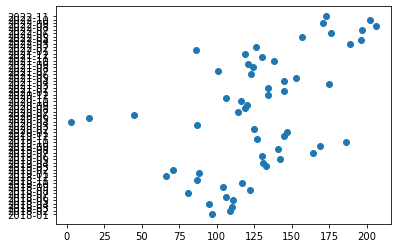

In [268]:
plt.scatter(case_load, year_month)
plt.show()